# 4. Árbol de decisiones

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import os

In [6]:
os.chdir("C:/Users/Señor Topo/Desktop/src/data/processed")

In [7]:
df = pd.read_csv("Heart_limpio.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,3.0,140.0,289.0,0.0,1.0,172.0,0.0,0.0,2.0,0.0
1,49.0,0.0,1.0,160.0,180.0,0.0,1.0,156.0,0.0,1.0,1.0,1.0
2,37.0,1.0,3.0,130.0,283.0,0.0,2.0,98.0,0.0,0.0,2.0,0.0
3,48.0,0.0,2.0,138.0,214.0,0.0,1.0,108.0,1.0,1.5,1.0,1.0
4,54.0,1.0,1.0,150.0,195.0,0.0,1.0,122.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1.0,4.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,1.0
914,68.0,1.0,2.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,1.0
915,57.0,1.0,2.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0
916,57.0,0.0,3.0,130.0,236.0,0.0,3.0,174.0,0.0,0.0,1.0,1.0


# Separamos la variable target

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

y = df["HeartDisease"]


# Creamos nuestro modelo

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [11]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor(random_state = 5)
modelo.fit(X_train,y_train)

DecisionTreeRegressor(random_state=5)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

y_pred = modelo.predict(X_test)

print("modelo_1 Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

modelo_1 Accuracy: 0.7934782608695652
Coeficiente determinación 0.14103194103194105
MAE 0.20652173913043478
MAPE 293713019176336.8
MSE 0.20652173913043478
RMSE 0.4544466295731929


In [13]:
print("Coeficiente determinación", r2_score(y_train, modelo.predict(X_train)))
print("MAE", mean_absolute_error(y_train, modelo.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, modelo.predict(X_train)))
print("MSE", mean_squared_error(y_train, modelo.predict(X_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, modelo.predict(X_train))))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


In [15]:
from sklearn.tree import plot_tree

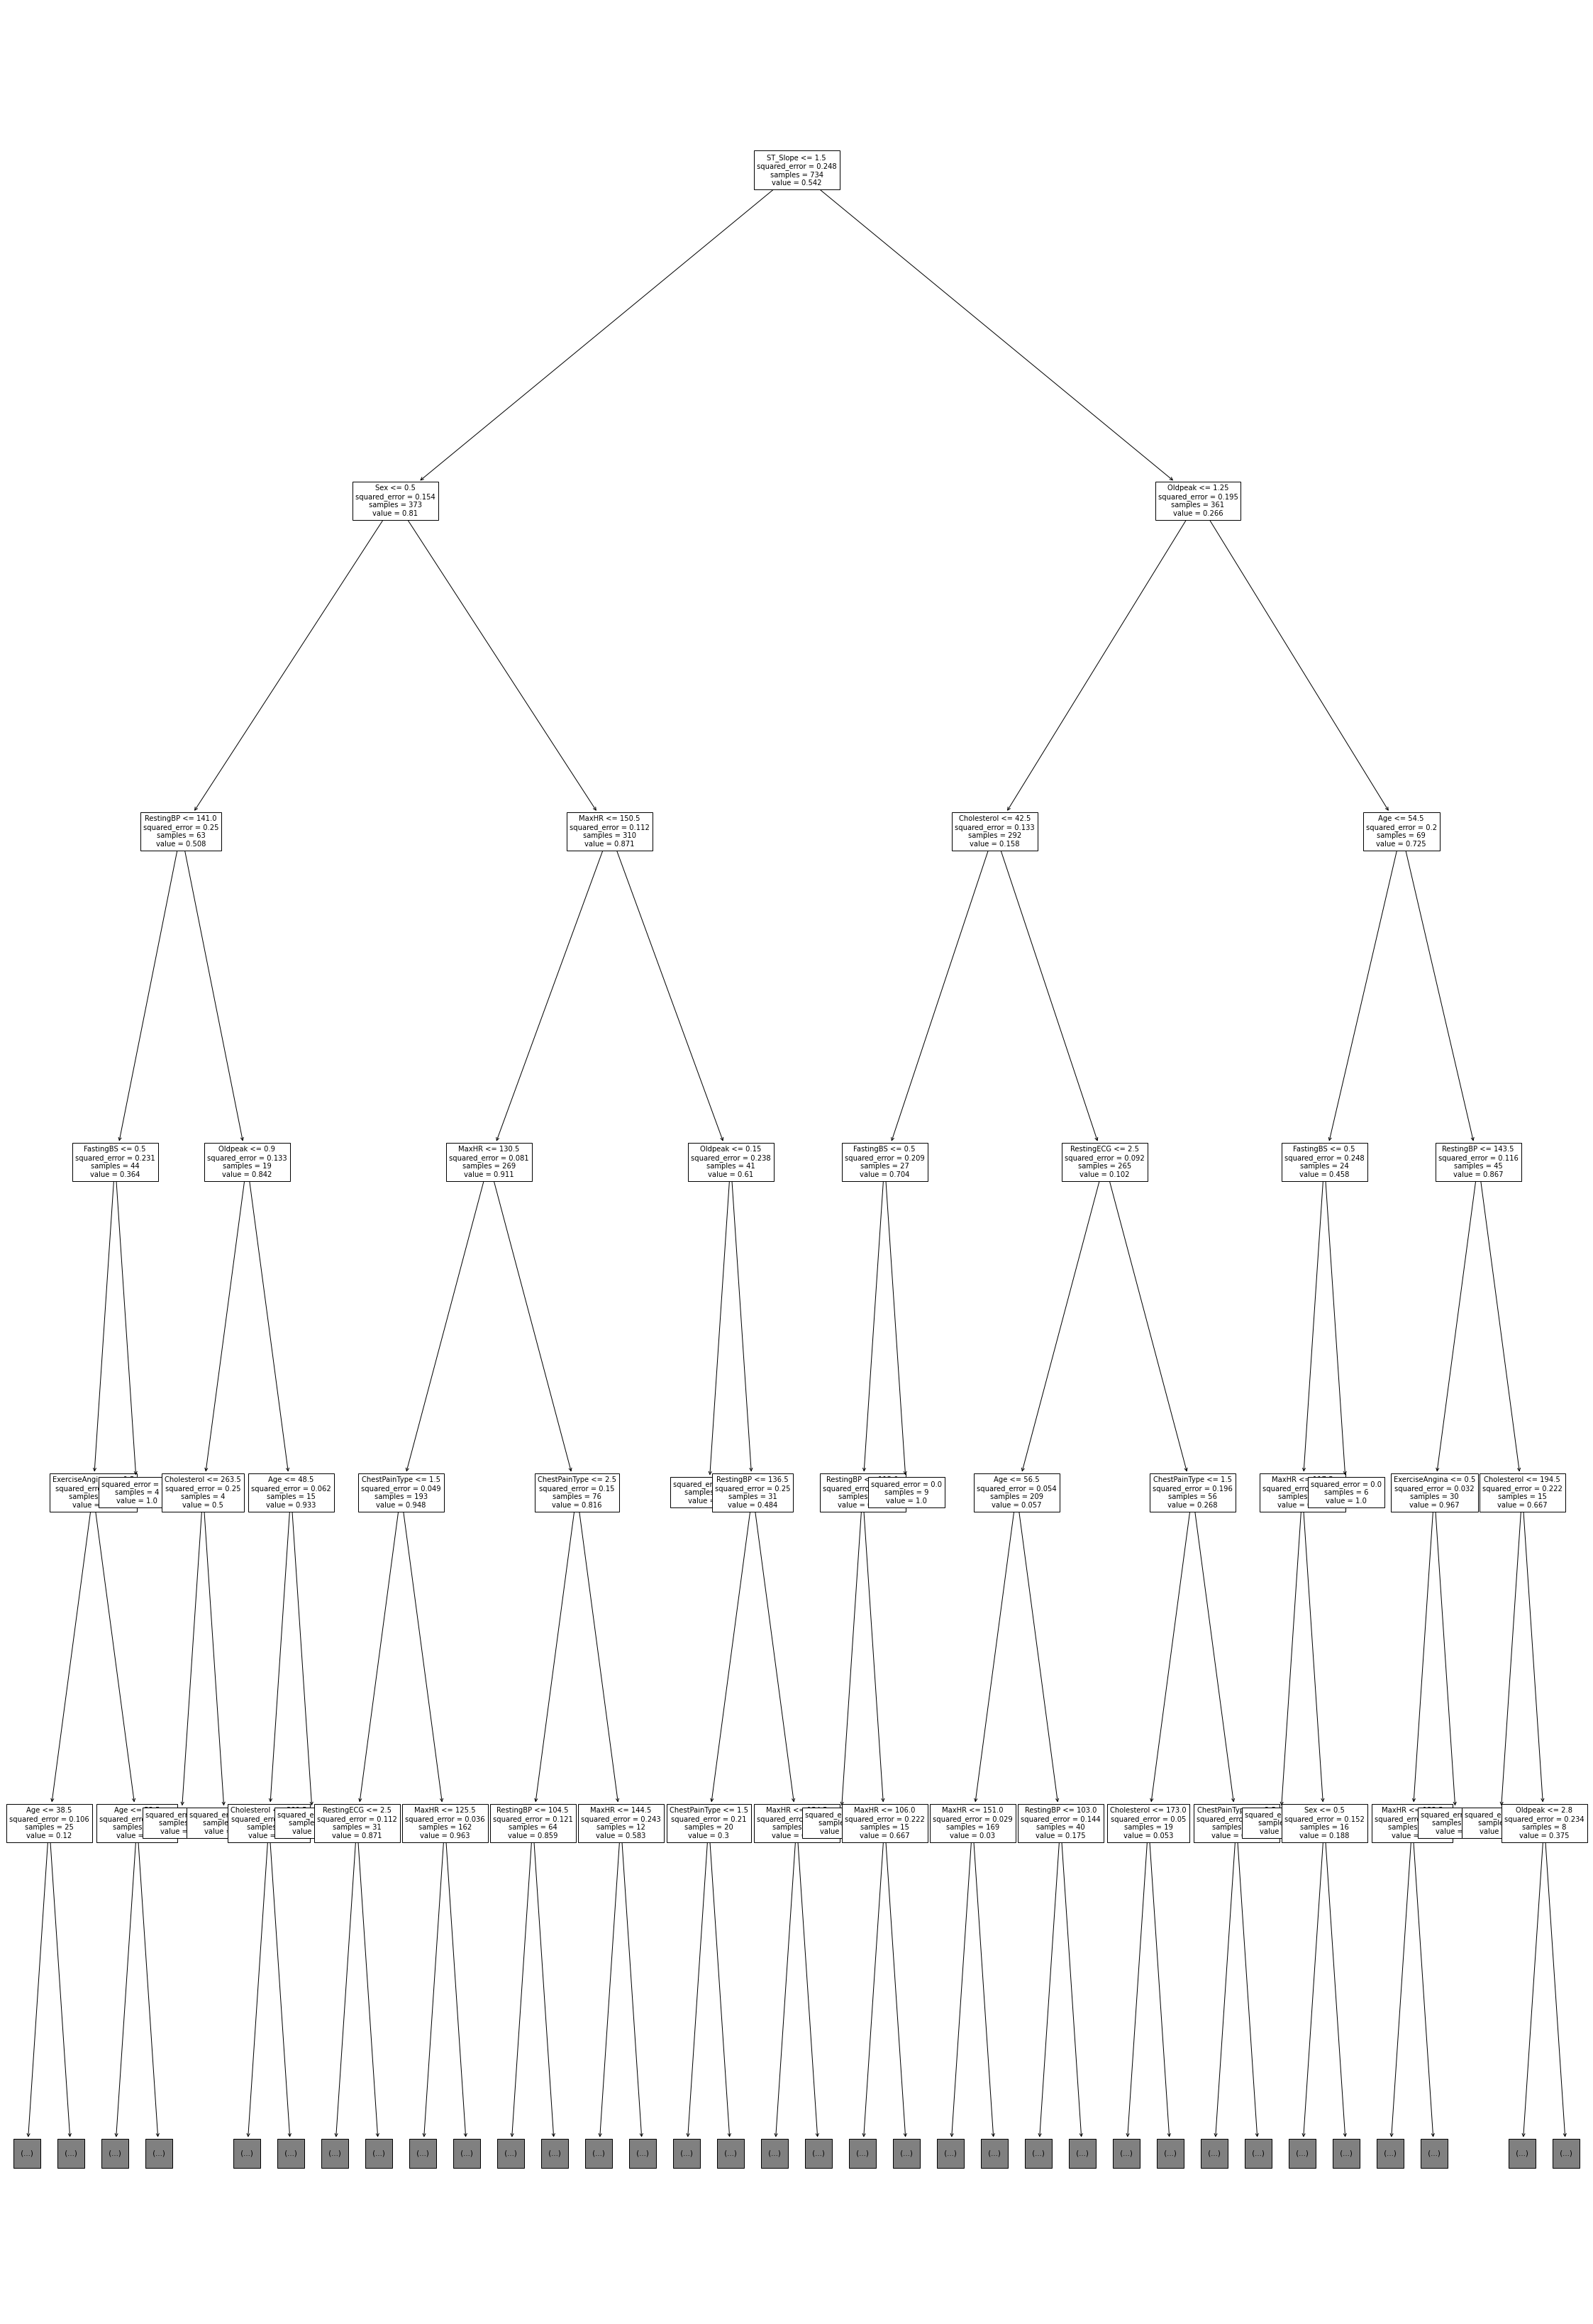

In [18]:
plt.figure(figsize=(20,30))

plot_tree(modelo, feature_names = X_train.columns, class_names = 'actual', fontsize=10, max_depth = 5);

## Probamos a cambiar la profundidad del árbol.

In [ ]:
modelo_2 = DecisionTreeRegressor(max_depth=24, random_state=7)
modelo_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=24, random_state=7)

In [ ]:
y_pred = modelo_2.predict(X_test)

print("modelo_2 Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

modelo_2 Accuracy: 0.8315217391304348
MAE 0.16847826086956522
MAPE 269236934244975.4
MSE 0.16847826086956522
RMSE 0.4104610345325914


# Eliminamos las variables con menor importacia y creamos de nuevo el modelo

In [ ]:
features_importance = pd.DataFrame({"Varible":X.columns, "Importancia":modelo.feature_importances_})
features_importance = features_importance.sort_values('Importancia', ascending=False)

In [ ]:
features_importance

,Varible,Importancia
10,ST_Slope,0.297680
9,Oldpeak,0.141186
4,Cholesterol,0.111206
7,MaxHR,0.101918
3,RestingBP,0.094194
0,Age,0.090730
2,ChestPainType,0.047821
5,FastingBS,0.041976
1,Sex,0.040277
6,RestingECG,0.020791


In [ ]:
X = df[['ST_Slope', 'Oldpeak', "Cholesterol", 'Age', "RestingBP", 'MaxHR',"Sex"]]

y = df["HeartDisease"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

modelo_3 = DecisionTreeRegressor(max_depth=60, random_state = 20)
modelo_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=60, random_state=20)

In [ ]:
y_pred = modelo_3.predict(X_test)

print("modelo_3 Accuracy:",metrics.accuracy_score(y_test, y_pred),"%")

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

modelo_3 Accuracy: 0.7753623188405797 %
Coeficiente determinación 0.1002681528997319
MAE 0.2246376811594203
MAPE 620060818261155.2
MSE 0.2246376811594203
RMSE 0.4739595775584879


# Probamos un Decision Tree Classifier y un Bagging Classifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(max_depth=60,random_state=56)

modelo_4 = BaggingClassifier(
    base_estimator = estimator,
    n_estimators=50, # Cantidad de árboles
    max_samples=300, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping
    max_features = 6, # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=1)


modelo_4.fit(X_train, y_train)
y_pred = modelo_4.predict(X_test)
accuracy_score(y_test, y_pred)

0.8442028985507246

# Probamos un Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_5 = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42)
modelo_5.fit(X_train, y_train)

y_pred_rf = modelo_5.predict(X_test)
# np.sum(y_test == y_pred_rf) / len(y_test) 
accuracy_score(y_test, y_pred_rf)

0.8260869565217391

# Probamos un Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rnd_reg = RandomForestRegressor(n_estimators=100,
                                 max_leaf_nodes=2,
                                 random_state=51)
rnd_reg.fit(X_train, y_train)

y_pred_reg = rnd_reg.predict(X_train)
mean_absolute_error(y_train, y_pred_reg)

0.3214610875532118

# Probamos un Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

estimator = DecisionTreeClassifier(max_depth=1)

modelo_6 = AdaBoostClassifier(base_estimator = estimator,
                             n_estimators=200,
                             learning_rate=0.5,
                             random_state=42)

modelo_6.fit(X_train, y_train)

y_pred = modelo_6.predict(X_test)
accuracy_score(y_test, y_pred)

0.8115942028985508

<h2>

**Predisión del Modelo 1:** *79,34 %*

**Predisión del Modelo 2:** *83,15 %*

**Predisión del Modelo 3:** *77,53 %*

**Predisión del Modelo 4:** *84,42 %*

**Predisión del Modelo 5:** *82,60 %*

**Predisión del Modelo 6:** *32,14%*

**Predisión del Modelo 7:** *81,15 %*


De todos estos modelos nos quedamos con el modelo 4, en el que hemos utilizado un Decission Tree y un Bagging Classifier.